# **Crie um modelo de análise das métricas RFV**

Você deverá utilizar um modelo de Clustering para criar um sistema
de agrupamento de perfis de clientes para um _e-commerce_. Deverá
analisar o modelo mais eficiente, capaz de tornar as análises mais
simplificadas para a empresa.

---

# **ETAPA 1: BUSINESS UNDERSTANDING**

## **Contexto**

Você foi contratado por uma empresa de e-commerce que está buscando entender melhor o comportamento de seus clientes para personalizar as suas campanhas de marketing. Para isso, a empresa disponibilizou uma base de dados em csv contendo dados sobre clientes, produtos e transações da loja realizadas entre os anos de 2010 e 2011.
Com base nesses dados, você precisa agrupar os clientes em clusters com base em seu comportamento de compra. Isso irá permitir identificar padrões e características em comum entre os clientes, como:
- Clientes que compram os mesmos produtos;
- Clientes que possuem a mesma frequência de compras;
- Clientes que gastam mais dinheiro em suas compras.

A partir desses clusters, gere insights para que a empresa possa segmentar melhor a sua base de clientes e personalizar as suas campanhas de marketing, direcionando promoções e ofertas aos clientes com base no comportamento de compras.

In [1]:
# pip install ydata-profiling
# !pip install sidetable

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import missingno as msno
from ipywidgets import interact, widgets

from ydata_profiling import ProfileReport

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

# **ETAPA 2: DATA UNDESTANDING**

Os dados fornecidos possuem informações de transações de compras de uma loja de e-commerce em 38 países e territórios, com mais de 4.000 clientes únicos e mais de 540.000 transações.

| Coluna      | Descrição                             | Tipo     |
|-------------|---------------------------------------|----------|
| InvoiceNo   | Identificação da transação            | Int      |
| StockCode   | Código de estoque do produto          | String   |
| Description | Descrição do produto                  | String   |
| Quantity    | Quantidade de produtos por transação  | Int      |
| InvoiceDate | Data da transação                     | Datetime |
| UnitPrice   | Preço unitário do produto             | Float    |
| CustomerID  | Identificação do cliente              | Int      |
| Country     | País de origem da transação           | String   |


In [3]:
# Banco de dados do projeto
df = pd.read_csv('data_analise_RFV.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Criar o relatório
# profile = ProfileReport(df, title="Relatório de Análise de Dados", explorative=True)
# profile.to_widgets()

# **ETAPA 3: DATA PREPARATION**

*LIMPEZA DOS DADOS - DATA CLEANING**

## *Dados Faltantes*



<Axes: >

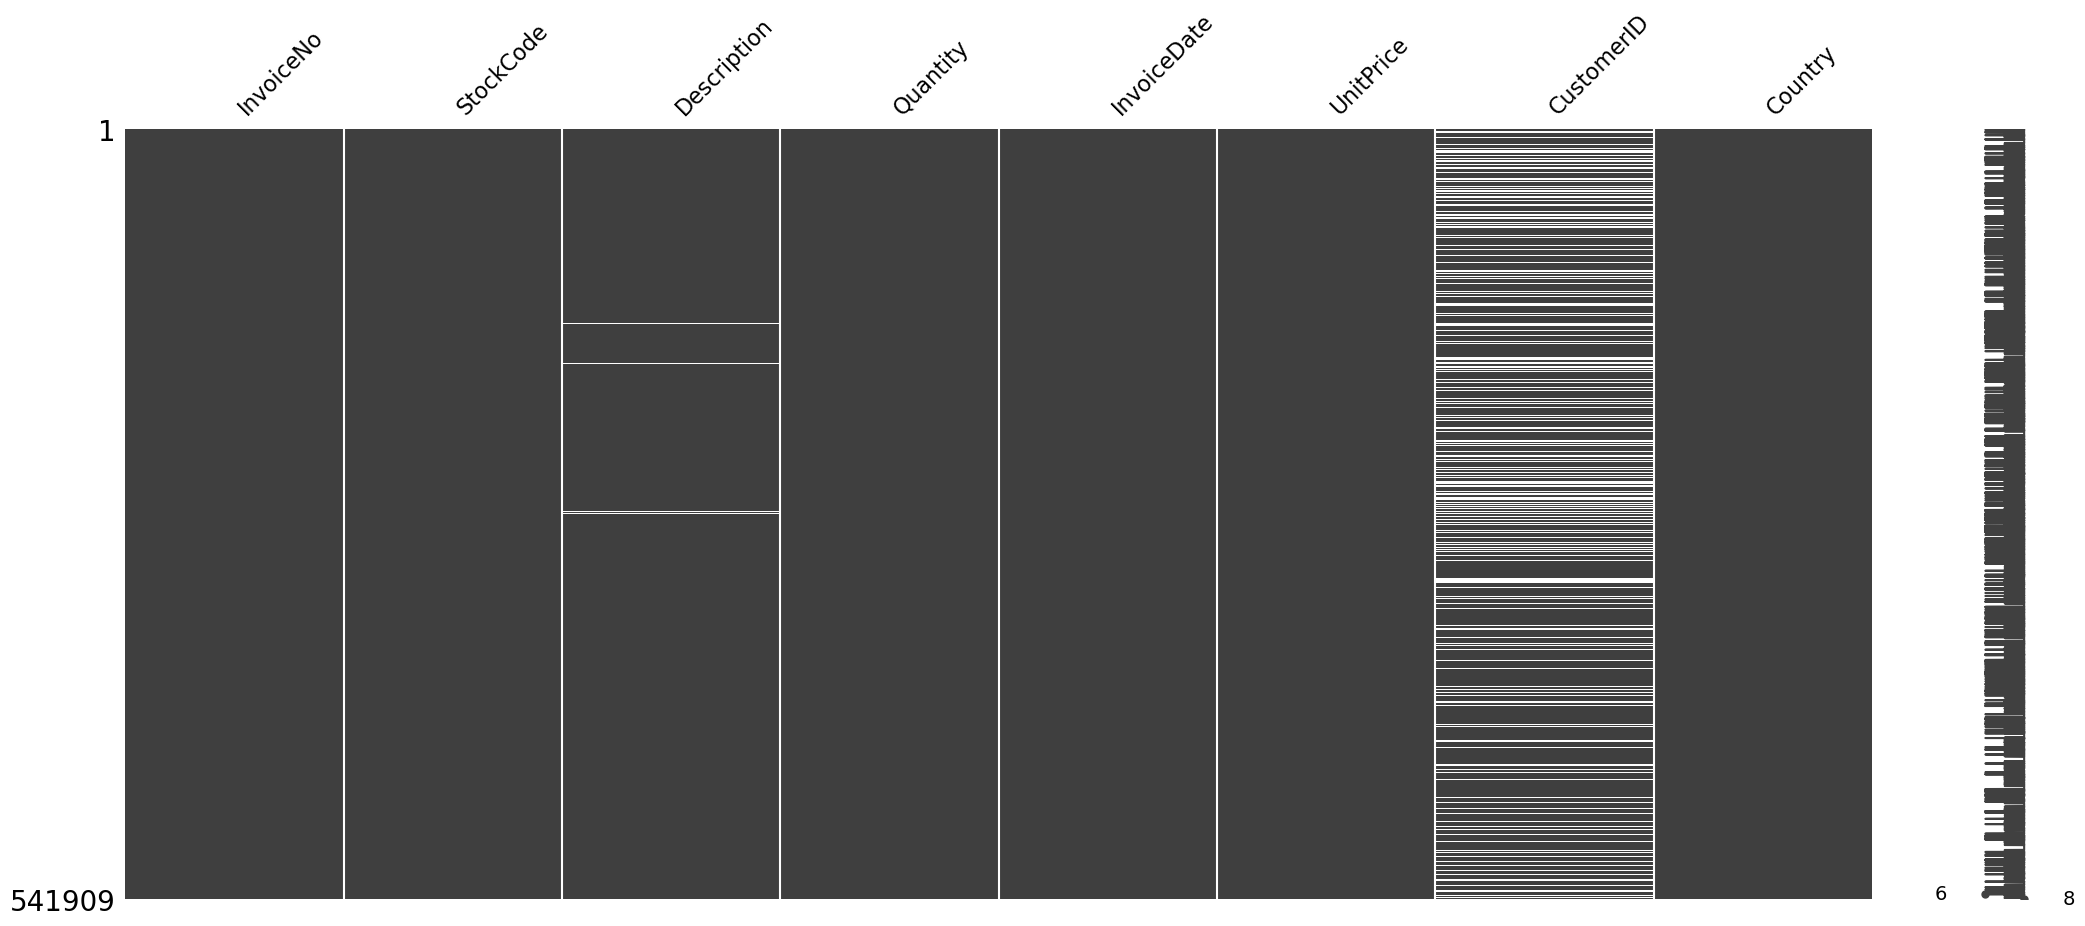

In [6]:
# Resumindo os dados que estão faltando, no formato de Gráfico
msno.matrix(df)

In [7]:
# Resumindo os dados que estão faltando, no formato de tabela
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


A coluna Description possui 1.454 valores nulos, representando cerca de 0,27% dos dados.
A coluna CustomerID possui 135.080 valores nulos, representando cerca de 24,93% dos dados.
Linhas Duplicadas:



In [8]:
# Remover valores nulos na coluna CustomerID, pois não é possível realizar a análise sem identificação do cliente
df = df.dropna(subset=['CustomerID'])

# Verificar as primeiras linhas dos dados limpos
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<Axes: >

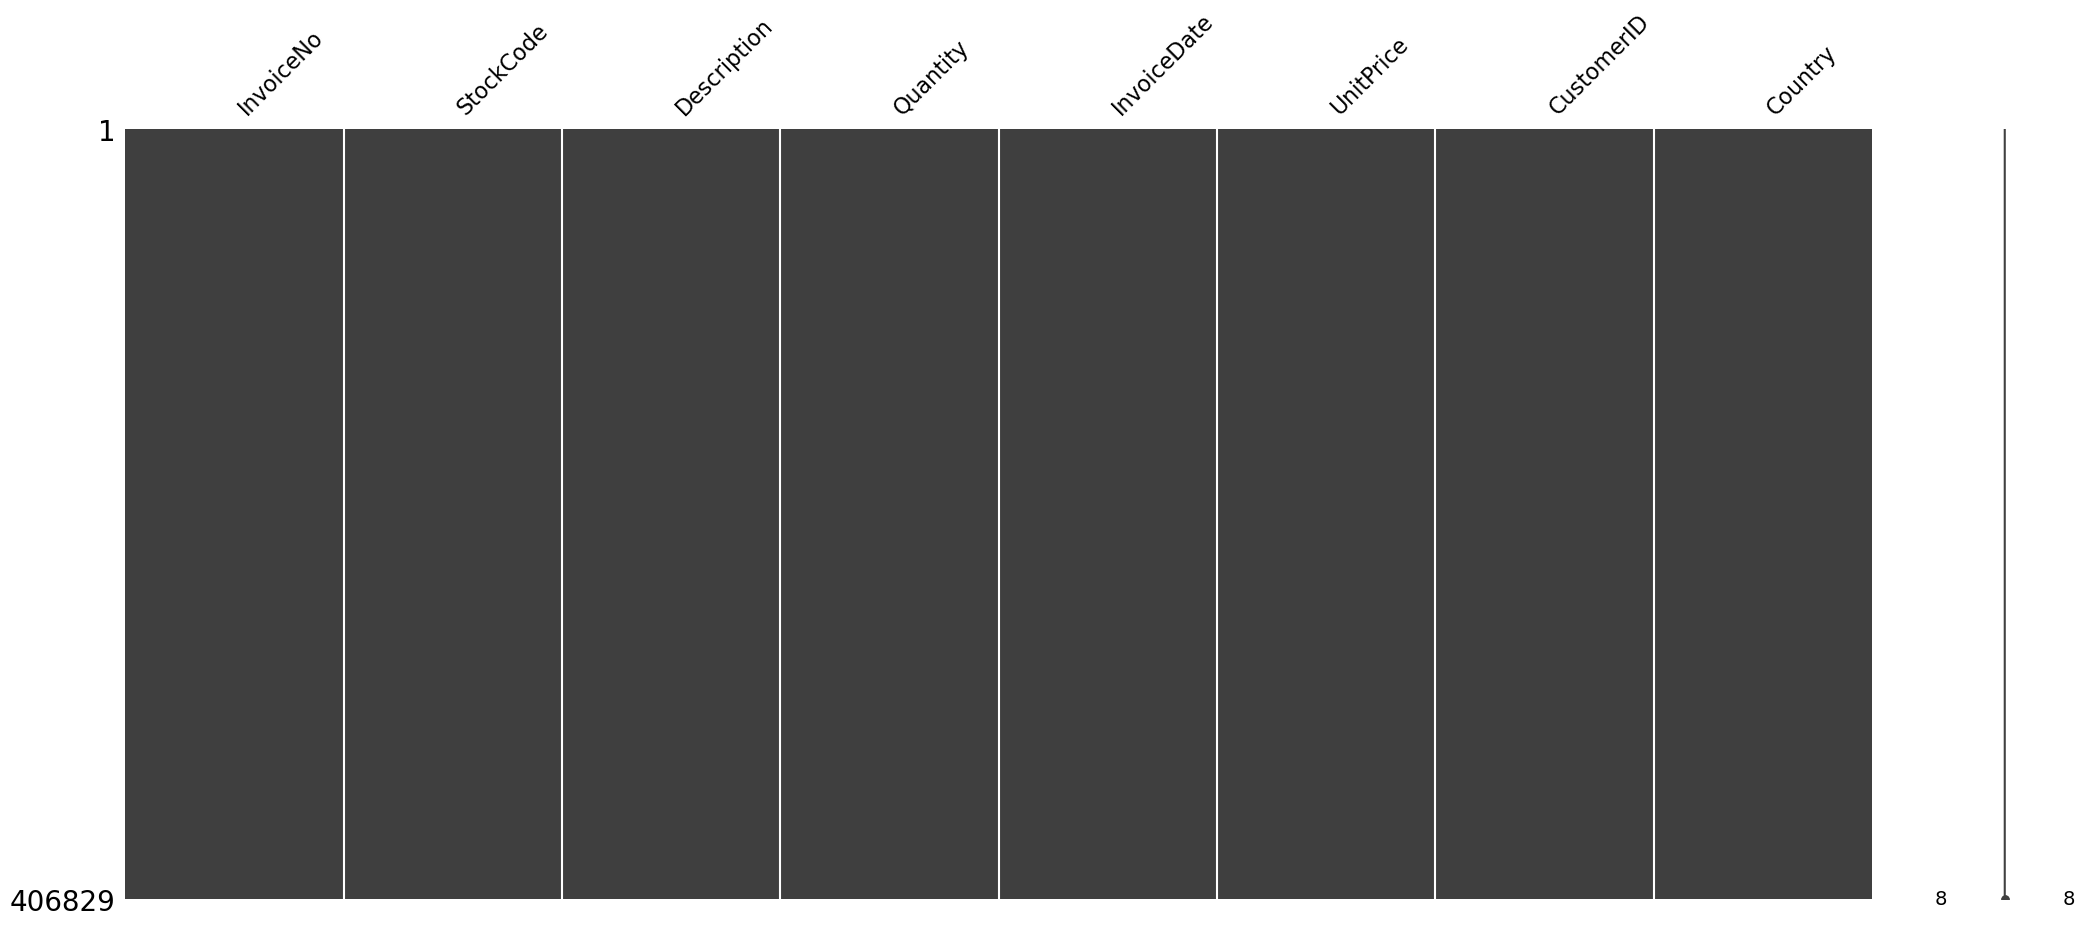

In [9]:
msno.matrix(df)

In [10]:
#Verificando se ainda há valores faltantes
df_clean = df.copy()
df.stb.missing()


,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0


## Valores Duplicados

In [11]:
df = df_clean.copy()

# Identificar quantos valores duplicados há em cada duplicata
(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(100)
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
572344    M         Manual                              48       10/24/2011 10:43 1.50      14607.0    United Kingdom             6
540524    21756     BATH BUILDING BLOCK WORD            1        1/9/2011 12:53   5.95      16735.0    United Kingdom             6
...                                                                                                                             ...
573150    23265     SET OF 3 WOODEN TREE DECORATIONS    1        10/27/2011 20:07 1.25      15014.0    United Kingdom             3
578757    23126     FELTCRAFT GIRL AMELIE KIT           1        11/25/2011 11:41 4.95      12748.0    United Kingdom             3
569670    22402     MAGNETS PACK OF 4 VINTAGE COLLAGE   1        10/5/2011 13:47  0.39      14730.0    United Kingdom             3
542107    21212     PACK OF 72 RETROSPOT CAKE CASES     1        1/25/2011 13:38  0.55      16222.0    United Kingdom             3
571682    23176     ABC TREASURE BOOK BOX               1        10/18/2011 14:00 2.25      14179.0    United Kingdom             3

[100 rows x 1 columns]

In [12]:
# Verificar a existência de linhas duplicadas
duplicated_rows = df.duplicated()

# Contar o número de linhas duplicadas
num_duplicated_rows = duplicated_rows.sum()

# Criar um dataframe para exibir a quantidade de duplicatas
duplicate_analysis = pd.DataFrame({
    'Número de Linhas Duplicadas': [num_duplicated_rows],
    'Proporção de Linhas Duplicadas (%)': [(num_duplicated_rows / len(df)) * 100]
})
duplicate_analysis

,Número de Linhas Duplicadas,Proporção de Linhas Duplicadas (%)
0,5225,1.284323


In [13]:
# Deletando as linhas duplicadas e mantendo o primeiro dado
df = df.drop_duplicates(keep='first')

df_clean = df.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Foram encontradas 5.192 linhas duplicadas no conjunto de dados, o que representa aproximadamente 1,31% do total. Todas foram deletadas.

## Retirada de valores sem sentido
* Preços unitários iguais ou menores que zero
* Quantidade de Produtos iguais ou menores que zero

In [14]:
df = df_clean.copy()

# Fazendo um filtro para retirar linhas com Preços unitários e
# Quantidade de Produtos menores ou iguais a zero:
condicao1 = df['UnitPrice'] > 0
condicao2 = df['Quantity'] > 0
df = df.loc[condicao1 & condicao2]

df_clean = df.copy()

## Correção do tipo de dados

In [15]:
df = df_clean.copy()

# ALTERANDO O FORMATO DOS DADOS
df['InvoiceNo'] = df['InvoiceNo'].astype(int)
df['Quantity'] = df['Quantity'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(int)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

df['TotalPrice']=df['Quantity']*df['UnitPrice']

df_clean = df.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  int32         
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int32         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int32         
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 25.5+ MB


<Axes: >

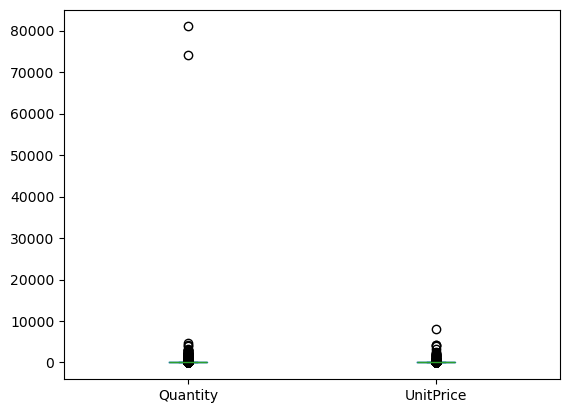

In [17]:
#Gráfico BoxPlot para identificação de Outliers. Não tem sentido aplicar no código do cliente.
df[['Quantity','UnitPrice']].plot.box()

In [18]:
# Cliente pediu para retirar os valores extremos as seguir:
condicao1 = df['UnitPrice'] <= 5000
condicao2 = df['Quantity'] <= 10000
df = df.loc[condicao1 & condicao2]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


<Axes: >

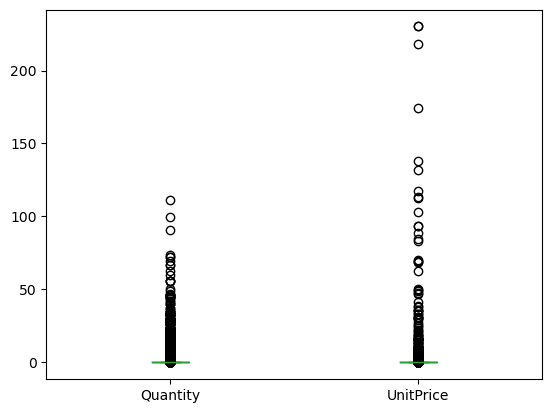

In [19]:
# Box plot com dados padronizados
df[['Quantity','UnitPrice']].apply(scale).plot.box()

In [20]:
df_clean = df.copy()

## NORMALIZAÇÃO DOS DADOS E RFV

In [21]:
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

df = df_clean.copy()

# Calcular Recência (R)
current_date = df['InvoiceDate'].max()
df['Recency'] = (current_date - df['InvoiceDate']).dt.days

# Calcular Frequência (F) e Valor Monetário (M)
rfm = df.groupby('CustomerID').agg({
    'Recency': 'min',  # Recência: menor valor de dias desde a última compra
    'InvoiceNo': 'nunique',  # Frequência: número de transações únicas
    'TotalPrice': 'sum'  # Valor Monetário: soma dos preços unitários
}).rename(columns={'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Normalizar os dados de Recência, Frequência e Valor Monetário
scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Verificar os dados normalizados
rfm.head()

# Salvar os dados RFM normalizados
# rfm.to_csv('dados_rfm_normalizados.csv')

,Recency,Frequency,Monetary
CustomerID,,,
12347,0.002681,0.028846,0.015371
12348,0.198391,0.014423,0.006404
12349,0.048257,0.000000,0.006262
12350,0.828418,0.000000,0.001183
12352,0.093834,0.033654,0.008933


In [22]:
# Normalizar os dados de Recência, Frequência e Valor Monetário
scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Salvar os dados RFM normalizados
rfm.to_csv('dados_rfm_normalizados.csv')

# Verificar os dados normalizados
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,0.002681,0.028846,0.015371
12348,0.198391,0.014423,0.006404
12349,0.048257,0.000000,0.006262
12350,0.828418,0.000000,0.001183
12352,0.093834,0.033654,0.008933


# **ETAPA 4: MODELING**

In [36]:
df = pd.read_csv('dados_rfm_normalizados.csv', encoding='ISO-8859-1')
df.head()

,CustomerID,Recency,Frequency,Monetary
0,12347,0.002681,0.028846,0.015371
1,12348,0.198391,0.014423,0.006404
2,12349,0.048257,0.000000,0.006262
3,12350,0.828418,0.000000,0.001183
4,12352,0.093834,0.033654,0.008933


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


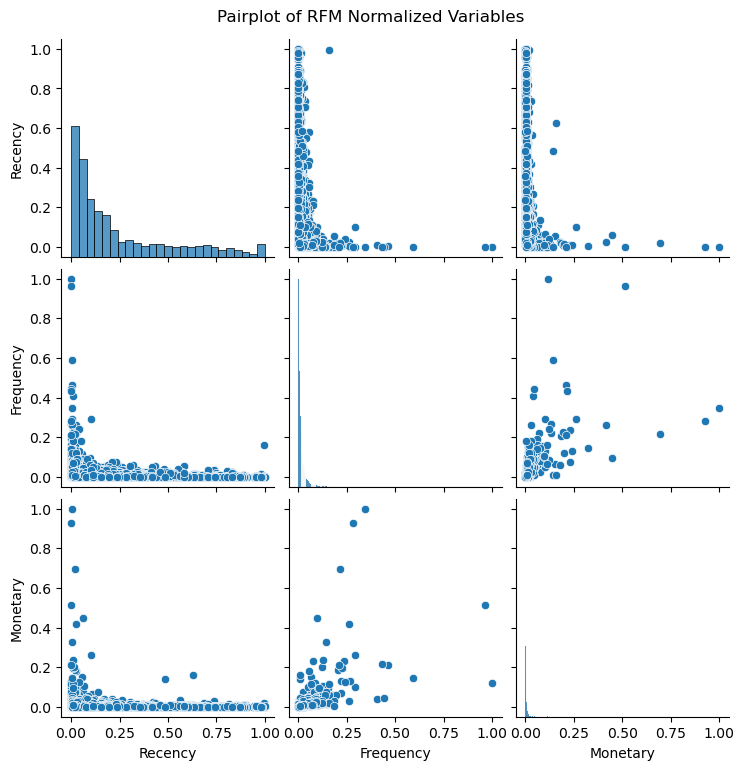

In [28]:
# Cria um pairplot para visualizar as relações entre Recência, Frequência e Valor Monetário
sns.pairplot(df.drop('CustomerID', axis=1))
plt.suptitle('Pairplot of RFM Normalized Variables', y=1.02)
plt.show()


# Análise preliminar

Tem 3 clientes que estão destoando muito dos dados, e serão considerados outliers para a geração de cluster. Apesar disso, a empresa deve tratá-los como  clientes premium, pois possuem uma alta frequência de compra e valor monetário. 

In [44]:
# Encontrar os 3 clientes com maior frequência
top_3_high_frequency_clients = df.nlargest(3, 'Frequency')

# Remover esses clientes do dataframe original
df_reduced = df[~df['CustomerID'].isin(top_3_high_frequency_clients['CustomerID'])]

# Refazer a normalização
rfm_reduced = df_reduced.drop(['CustomerID', 'Cluster'], axis=1, errors='ignore')
scaler = StandardScaler()
rfm_scaled_reduced = scaler.fit_transform(rfm_reduced)

df_reduced.head()

,CustomerID,Recency,Frequency,Monetary
0,12347,0.002681,0.028846,0.015371
1,12348,0.198391,0.014423,0.006404
2,12349,0.048257,0.000000,0.006262
3,12350,0.828418,0.000000,0.001183
4,12352,0.093834,0.033654,0.008933


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

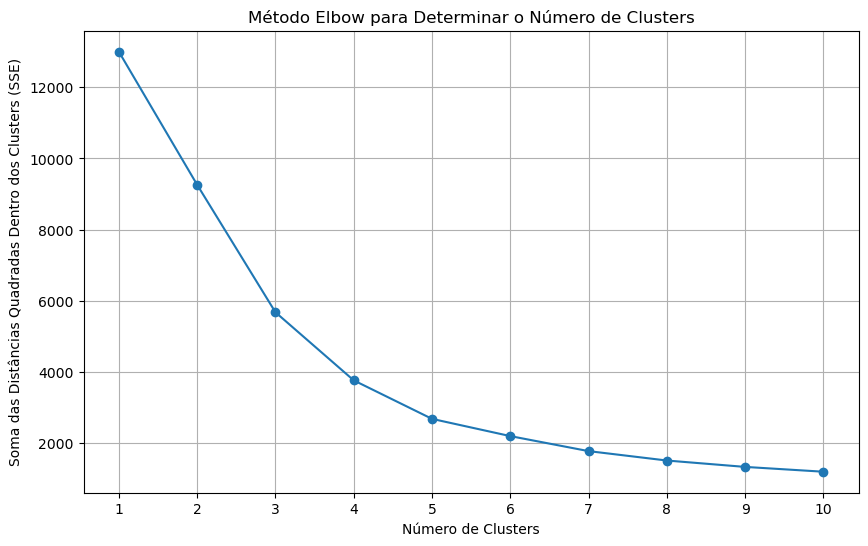

In [41]:
from sklearn.cluster import KMeans
import numpy as np

# Utilizar a soma das distâncias quadradas dentro dos clusters para o método Elbow
sse = []
k_range = range(1, 11)  # Verificar de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_reduced)
    sse.append(kmeans.inertia_)

# Plotar o gráfico do método Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das Distâncias Quadradas Dentro dos Clusters (SSE)')
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()


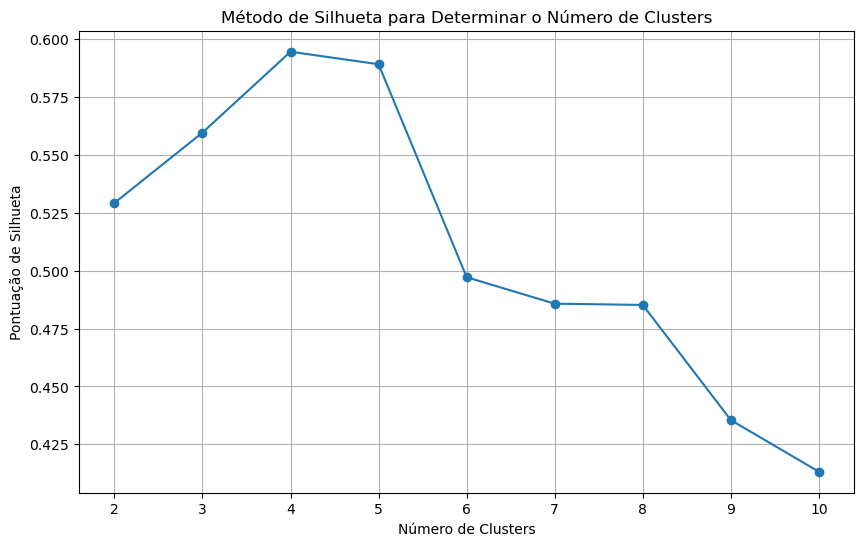

In [45]:
from sklearn.metrics import silhouette_score

# Calcular a pontuação de silhueta para diferentes números de clusters
silhouette_scores = []

for k in range(2, 11):  # Verificar de 2 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(rfm_scaled_reduced)
    score = silhouette_score(rfm_scaled_reduced, kmeans.labels_)
    silhouette_scores.append(score)

# Plotar o gráfico das pontuações de silhueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação de Silhueta')
plt.title('Método de Silhueta para Determinar o Número de Clusters')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()



C:\Users\Reiner\AppData\Local\Temp\ipykernel_10540\1330184962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['Cluster'] = kmeans.labels_


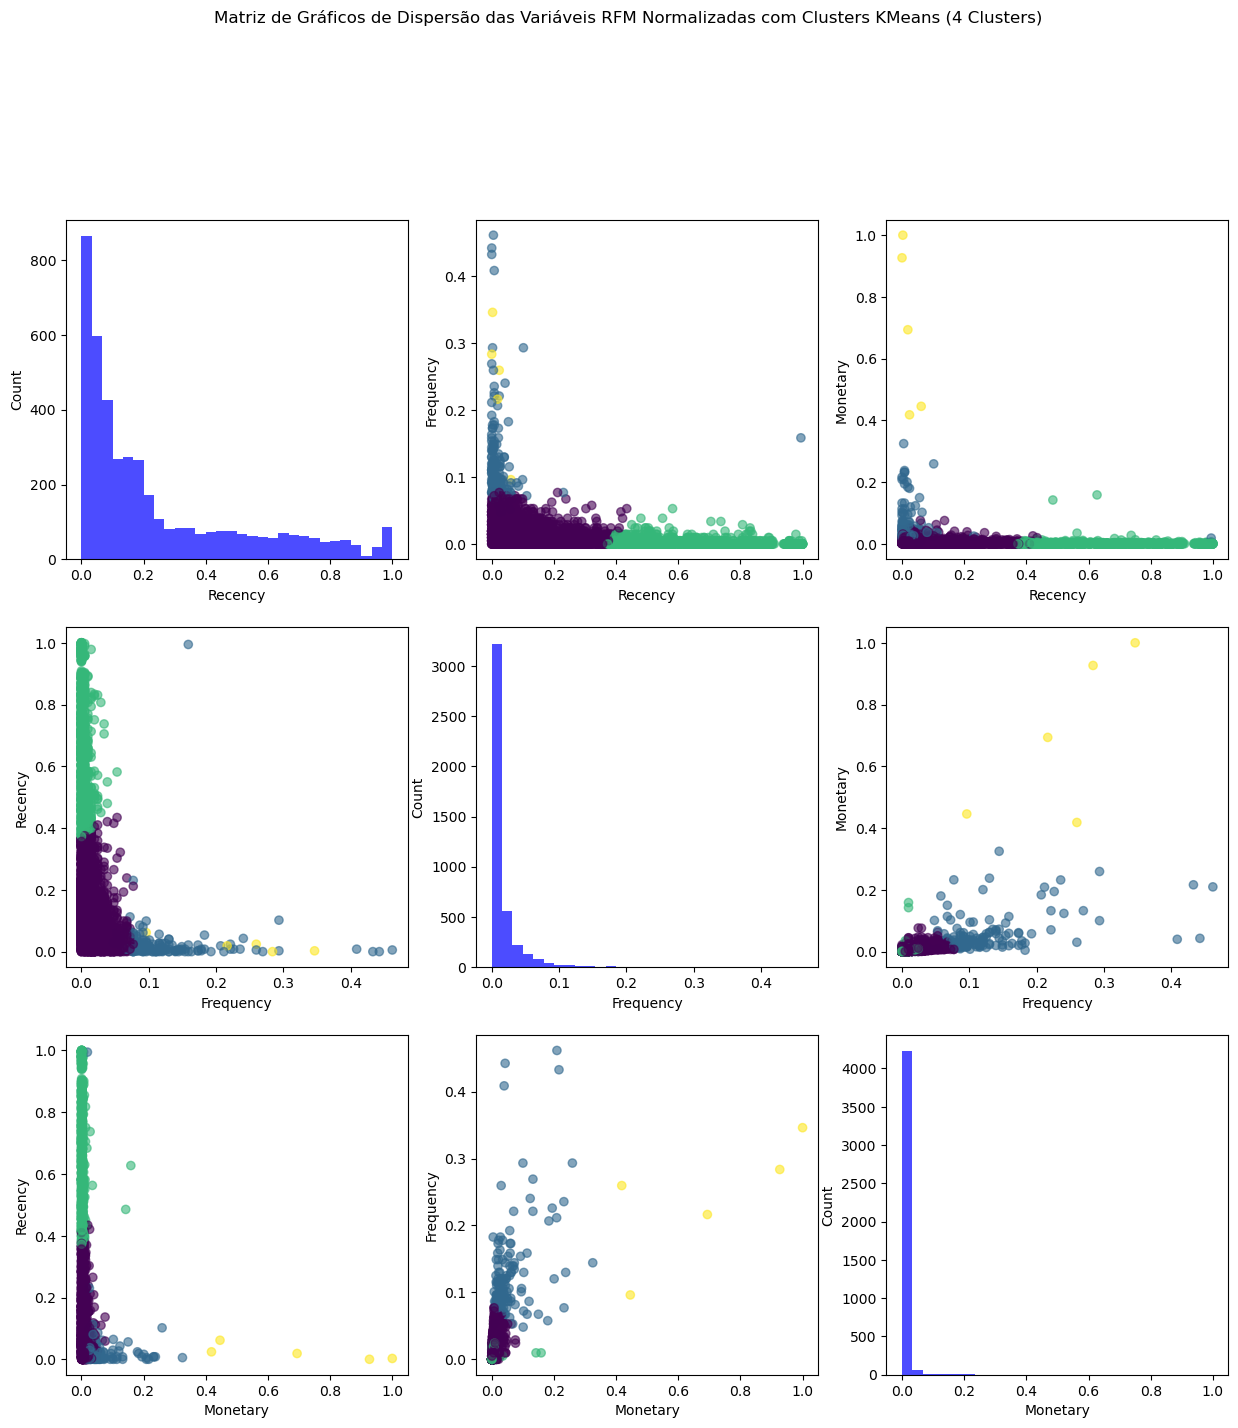

In [46]:
# Aplicar KMeans com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10, max_iter=300)
kmeans.fit(rfm_scaled_reduced)
df_reduced['Cluster'] = kmeans.labels_

# Visualizar os clusters em gráficos de dispersão
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Lista das colunas para plotagem
columns = ['Recency', 'Frequency', 'Monetary']

for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        ax = axes[i, j]
        if i == j:
            # Diagonal: histograma
            ax.hist(df_reduced[col1], bins=30, alpha=0.7, color='blue')
            ax.set_xlabel(col1)
            ax.set_ylabel('Count')
        else:
            # Fora da diagonal: gráfico de dispersão
            scatter = ax.scatter(df_reduced[col1], df_reduced[col2], c=df_reduced['Cluster'], cmap='viridis', alpha=0.6)
            ax.set_xlabel(col1)
            ax.set_ylabel(col2)

fig.suptitle('Matriz de Gráficos de Dispersão das Variáveis RFM Normalizadas com Clusters KMeans (4 Clusters)', y=1.02)
plt.show()

# **ETAPA 5: EVALUATION e DEPLOYMENT**

A tabela abaixo resume as médias das variáveis RFM para cada cluster, ajudando a identificar as características principais de cada grupo de clientes.

| Cluster | CustomerID  | Recency | Frequency | Monetary |
|---------|-------------|---------|-----------|----------|
| 0       | 15286.73    | 0.1126  | 0.0138    | 0.0052   |
| 1       | 15255.89    | 0.0264  | 0.1239    | 0.0552   |
| 2       | 15348.92    | 0.6602  | 0.0026    | 0.0020   |
| 3       | 15353.80    | 0.0214  | 0.2404    | 0.6969   |


### Perfil de Compras dos Clientes em Cada Cluster

- **Cluster 0 (Verde)**:
  - **Perfil**: Clientes que compraram recentemente, mas não compram frequentemente e têm um gasto moderado.
  - **Interpretação**: Estes clientes podem ser novos ou ocasionais, que fizeram uma compra recente.
  - **Ação**: Implementar campanhas de retenção para aumentar a frequência de compra, como descontos exclusivos para a próxima compra.

- **Cluster 1 (Amarelo)**:
  - **Perfil**: Clientes que compraram muito recentemente, compram frequentemente e gastam consideravelmente.
  - **Interpretação**: Clientes valiosos e ativos, possivelmente leais e engajados.
  - **Ação**: Continuar incentivando a lealdade com recompensas, programas de pontos ou ofertas especiais.

- **Cluster 2 (Roxo)**:
  - **Perfil**: Clientes que não compram há muito tempo, compram muito pouco e gastam pouco.
  - **Interpretação**: Clientes inativos ou em risco de churn.
  - **Ação**: Reativar esses clientes com campanhas específicas, como descontos de "bem-vindo de volta" ou ofertas exclusivas para compras de retorno.

- **Cluster 3 (Azul)**:
  - **Perfil**: Clientes que compraram muito recentemente, compram com altíssima frequência e têm um gasto elevado.
  - **Interpretação**: Os clientes mais valiosos, possivelmente os melhores clientes da empresa.
  - **Ação**: Recompensar a lealdade e incentivar compras adicionais com programas VIP, descontos exclusivos e acesso prioritário a novos produtos ou serviços.

### Utilidade da Análise para a Empresa

- **Segmentação de Clientes**:
  - **Justificativa**: Identificar diferentes perfis de clientes permite à empresa dividir sua base de clientes em segmentos específicos com características semelhantes. Isso possibilita o desenvolvimento de estratégias de marketing mais focadas e eficazes, alinhadas com as necessidades e comportamentos de cada grupo.
  - **Exemplo**: Clientes do Cluster 1 (Amarelo) podem ser alvo de campanhas de fidelização para manter sua lealdade, enquanto os clientes do Cluster 2 (Roxo) podem receber campanhas de reativação para incentivá-los a voltar a comprar.

- **Personalização das Campanhas de Marketing**:
  - **Justificativa**: Campanhas direcionadas a segmentos específicos aumentam a relevância das mensagens de marketing, resultando em um maior engajamento dos clientes e uma taxa de resposta mais alta. Isso se traduz em um melhor retorno sobre o investimento em marketing e uma experiência mais satisfatória para o cliente.
  
